# Milestone 2
Supervised learning.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
import sklearn.preprocessing
import sklearn.metrics
import seaborn as sns; sns.set()

from sklearn import neighbors, linear_model, svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

## Load data

In [89]:
df = pd.read_csv('dengue_features_train.csv')
y_ = pd.read_csv('dengue_labels_train.csv')

In [90]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [91]:
df.drop(['week_start_date'], axis=1, inplace=True)
df.set_index(['city', 'year', 'weekofyear'], inplace=True)
y_.set_index(['city', 'year', 'weekofyear'], inplace=True)
df.shape, y_.shape

((1456, 20), (1456, 1))

In [92]:
df.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   1990 18          0.122600  0.103725  0.198483  0.177617   
          19          0.169900  0.142175  0.162357  0.155486   
          20          0.032250  0.172967  0.157200  0.170843   
          21          0.128633  0.245067  0.227557  0.235886   
          22          0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571

In [93]:
df.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


# Preprocessing

## Fill NaN

In [94]:
df.isna().sum()
# ffill: propagate last valid observation forward to next valid backfill
# @ Check other methods
df.fillna(method="bfill", inplace=True)
df.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Normalize data

In [95]:
scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()
X_ = scaler.fit_transform(df)

## PCA
Normalize the data and apply find best principal components.

In [96]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_)
X_pca.shape

(1456, 20)

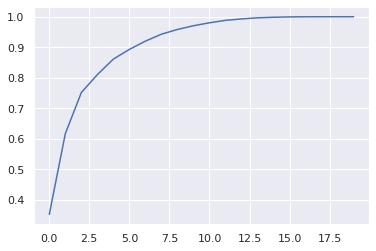

In [97]:
var_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(len(var_ratio)), np.cumsum(var_ratio))

In [98]:
X_pca = pd.DataFrame(X_pca, index=df.index)

## Prepare work sets

In [99]:
GROUP_SUBSET = False

In [100]:
X_ = pd.DataFrame(X_, index=df.index, columns=df.columns)

In [101]:
if GROUP_SUBSET:
    sj = X_.loc['sj'][X_.loc['sj'].index.get_level_values(0) >= 1992]
    sj = sj[sj.index.get_level_values(0) <= 1998]
    X_.drop('sj', level=0, inplace=True)
    X_ = pd.concat((pd.concat({'sj':sj}), X_))

    sj = y_.loc['sj'][y_.loc['sj'].index.get_level_values(0) >= 1992]
    sj = sj[sj.index.get_level_values(0) <= 1998]
    y_.drop('sj', level=0, inplace=True)
    y_ = pd.concat((pd.concat({'sj':sj}), y_))

## Preprocess function
Define a function which allows repetition of the preprocessing steps taken.

In [102]:
def preprocess(df, pca=False):
    df.drop(['week_start_date'], axis=1, inplace=True)
    df.set_index(['city', 'year', 'weekofyear'], inplace=True)
    
    df.fillna(method="bfill", inplace=True)
    scaler = sklearn.preprocessing.StandardScaler()
    x = scaler.fit_transform(df)
    x = pd.DataFrame(x, index=df.index, columns=df.columns)
    
    if pca:
        pca = PCA()
        x = pca.fit_transform(x)
        return pd.DataFrame(x, index=df.index)
    
    return x

# 0. Analyze data

In [103]:
X_analyze = X_.join(y_)
X_pca_analyze = X_pca.join(y_)

### Distribution

Text(0.5, 1.0, 'iq')

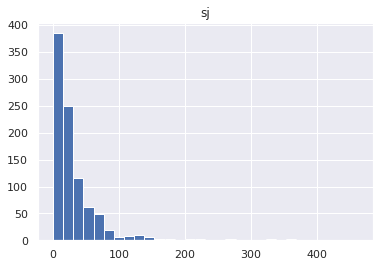

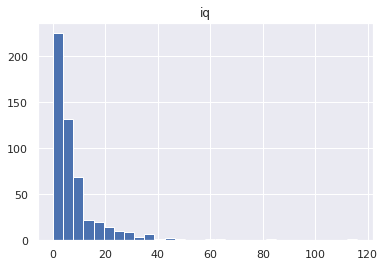

In [104]:
y_.loc['sj'].hist(bins=30)
plt.title('sj')
y_.loc['iq'].hist(bins=30)
plt.title('iq')

## 0.1. Target space transformation
The goal is to achieve normal distribution on the target state space.

In [105]:
class LogShift:
    ENABLED = True
    
    @staticmethod
    def normal(arr):
        return np.log(arr + 1)
    
    @staticmethod
    def original(arr):
        return np.rint(np.exp(arr) - 1) if LogShift.ENABLED else arr
    
v = np.array([0.0, 1.0, 3.0, 10.0])
assert (v == LogShift.original(LogShift.normal(v))).all()

In [106]:
y_['normal'] = LogShift.normal(y_.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12243759d0>,
      dtype=object)

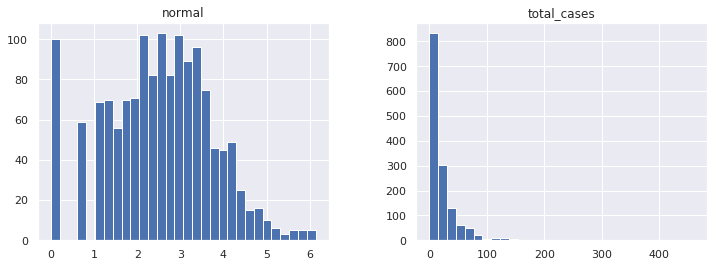

In [107]:
y_.hist(bins=30, figsize=(12,4))

#### Mean and variance

In [108]:
pd.concat({'mean':y_.mean(level=0), 'var':y_.var(level=0)}, axis=1).swaplevel(0, 1, axis=1).sort_index(axis=1)

normal           total_cases             
          mean       var        mean          var
city                                             
sj    3.002533  1.066237   34.180556  2640.045440
iq    1.601179  1.130588    7.565385   115.895524

## 0.2. Features importance

In [109]:
corr_X = X_analyze.corr()

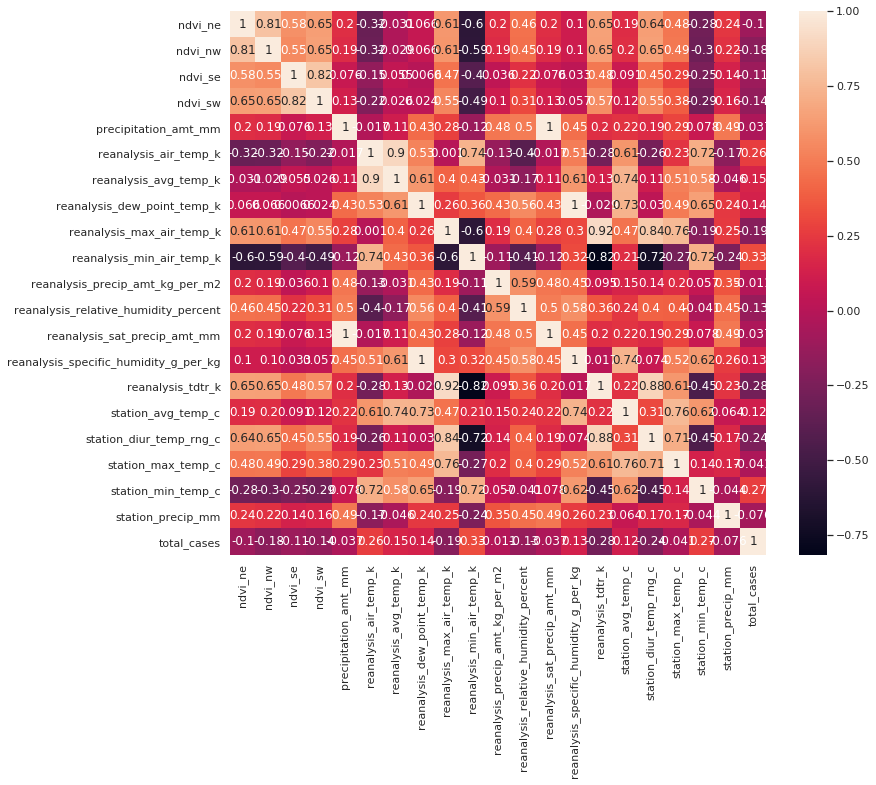

In [110]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_X, annot=True)

### 0.2.1. Find correlated features

In [111]:
threshold = 0.8

In [112]:
duplicates = corr_X.abs().values > threshold
duplicate_count = pd.DataFrame(duplicates.sum(axis=0) - 1, index=corr_X.index, columns=['duplicates'])

duplicates = np.argwhere(duplicates)
duplicates = duplicates[(lambda x: x[0] != x[1])(duplicates.T)]
duplicates.sort()

duplicates = np.vectorize(lambda x: corr_X.columns[x])(duplicates)

In [113]:
duplicates = set([tuple(elem) for elem in duplicates])
duplicates

{('ndvi_ne', 'ndvi_nw'),
 ('ndvi_se', 'ndvi_sw'),
 ('precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'),
 ('reanalysis_air_temp_k', 'reanalysis_avg_temp_k'),
 ('reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg'),
 ('reanalysis_max_air_temp_k', 'reanalysis_tdtr_k'),
 ('reanalysis_max_air_temp_k', 'station_diur_temp_rng_c'),
 ('reanalysis_min_air_temp_k', 'reanalysis_tdtr_k'),
 ('reanalysis_tdtr_k', 'station_diur_temp_rng_c')}

### 0.2.2. Feature importances

0.1486834166525061

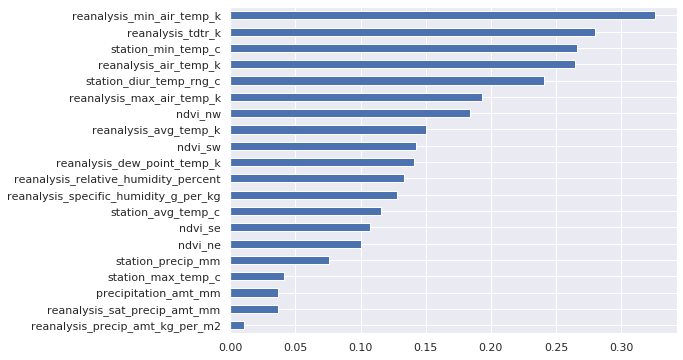

In [114]:
plt.figure(figsize=(8,6))
feature_importance_X = corr_X['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_X.plot.barh()
feature_importance_X.mean()

### 0.2.3. Clean duplicates with less importance

In [115]:
needs_cleaning = []
for a,b in duplicates:
    bias = feature_importance_X[a] - feature_importance_X[b]
    needs_cleaning.append(b if bias > 0 else a)

In [116]:
needs_cleaning

['station_diur_temp_rng_c',
 'precipitation_amt_mm',
 'ndvi_ne',
 'ndvi_se',
 'reanalysis_max_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_max_air_temp_k',
 'reanalysis_tdtr_k',
 'reanalysis_avg_temp_k']

In [117]:
X_.drop(needs_cleaning, axis=1, inplace=True)
X_analyze.drop(needs_cleaning, axis=1, inplace=True)

0.14481925527032521

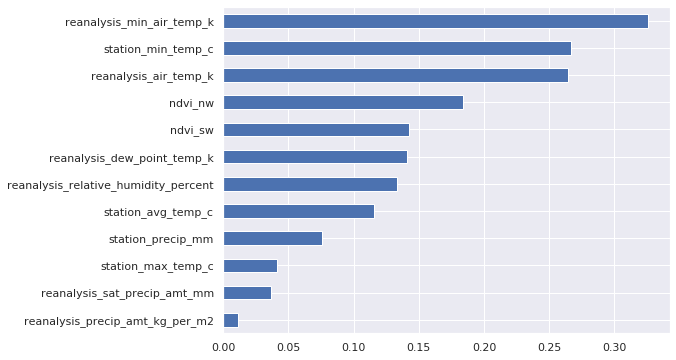

In [118]:
plt.figure(figsize=(8,6))
feature_importance_X = X_analyze.corr()['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_X.plot.barh()
feature_importance_X.mean()

## 0.3. PCA components importance

In [119]:
corr_pca = X_pca_analyze.corr()

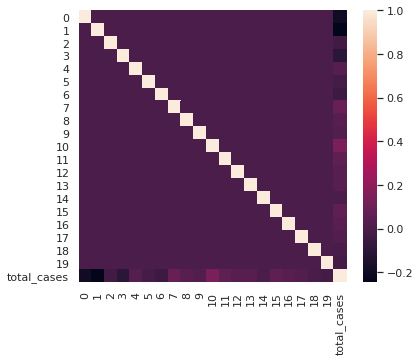

In [120]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_pca, annot=False)

0.06194929622698806

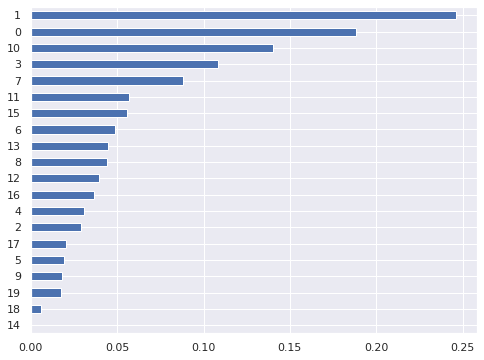

In [121]:
plt.figure(figsize=(8,6))
feature_importance_pca = corr_pca['total_cases'].drop('total_cases').abs().sort_values()
feature_importance_pca.plot.barh()
feature_importance_pca.mean()

# 1. Baseline

### Helper functions

In [122]:
def split_to_train(X, y, test_size=0.1):
      return train_test_split(pd.concat([X, y], axis=1), test_size=test_size)
    
def get_predictions(regressor, X):
    return np.rint(regressor.predict(X))

def get_mae(regressor, X, y):
    y_pred = get_predictions(regressor, X)
    return mean_absolute_error(y_pred, y)

def fit_regressor(regressor, X, y):
    train, test = split_to_train(X, y)
    regressor.fit(X=train.drop(['total_cases'], axis=1), y=train['total_cases'])
    
    return get_mae(regressor, test.drop(['total_cases'], axis=1), test['total_cases'])

def generate_visualization(y_pred, y):
    mae = mean_absolute_error(y, y_pred)

    plt.plot(np.arange(len(y_pred)), y, c='r', label='data')
    plt.plot(np.arange(len(y_pred)), y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()

    plt.show()
    return mae

def get_fold_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = []
    cv = KFold(n_splits, shuffle=False)
    for train_fold, test_fold in cv.split(X):
        X_train = X.iloc[train_fold]
        X_test = X.iloc[test_fold]
        y_train = y.iloc[train_fold]
        y_test = y.iloc[test_fold]

        regressor.fit(X=X_train, y=y_train.values.ravel())
        fold_accuracy.append(get_mae(regressor, X_test, y_test))
    return fold_accuracy

def get_accuracy(regressor, X, y, n_splits=10):
    fold_accuracy = get_fold_accuracy(regressor, X, y, n_splits)
    return max(fold_accuracy) #sum(fold_accuracy) / len(fold_accuracy)

def generate_plot(X, y, regressor, param_name, pm_range, n_split=10):
    mae = []
    for i in pm_range:
        regressor.set_params(**{param_name:i})
        mae.append(get_accuracy(regressor, X, y, n_split))

    label = type(regressor).__name__

    if type(regressor).__name__ == 'KNeighborsRegressor':
        label = regressor.get_params()['weights']
    elif type(regressor).__name__ == 'RandomForestRegressor':
        params = regressor.get_params()
        n_estimators = params['n_estimators']
        max_depth = params[param_name]
        label = f'n_estimators={n_estimators}'

    plt.plot(pm_range, mae, marker='o', label=label)
    print ('Min Value: {} ({})'.format(min(mae), list(pm_range)[np.argmin(mae)]))
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend()

def save_results(y_pred, name, index):
    res = np.rint(y_pred) # round
    res = res.astype(int) # cast to int
    aux = pd.DataFrame(np.vstack((*np.array(index.values.tolist()).T, res)).T, columns=list(index.names)+['total_cases'])
    aux.to_csv(name, index=False)
    return name

## 1.0. Select data to work on

### 1.0.1. Drop least important features

In [123]:
importances = feature_importance_X
drop_features = 0

drop_features = list(importances[:drop_features].index)
drop_features

[]

### 1.0.2. Set target dataset
Here we assign a work dataset.
It can be the whole dataset / Iquitos part / San Juan part / PCA or any other stored dataframe.

In [124]:
list(y_.columns)

['total_cases', 'normal']

In [173]:
# sj / iq
city = 'iq'

In [174]:
X = X_.loc[city].drop(drop_features, axis=1)
y = y_.loc[city]['normal']

In [175]:
# Set to False when using original total_cases column
#LogShift.ENABLED = False
if LogShift.ENABLED:
    y.name = 'total_cases'

### 1.0.3. Train test split

In [176]:
ds_train, ds_test = split_to_train(X, y, 0.15)

In [177]:
X_train = ds_train.drop('total_cases', axis=1)
X_test = ds_test.drop('total_cases', axis=1)
y_train = ds_train['total_cases']
y_test = ds_test['total_cases']

In [178]:
X_train.shape

(442, 12)

## 1.1. KNN

### 1.1.1. Mean absolute error

Weights: uniform =>
Min Value: 1.3356696645292392 (22)
Weights: distance =>
Min Value: 1.3549004337600083 (3)


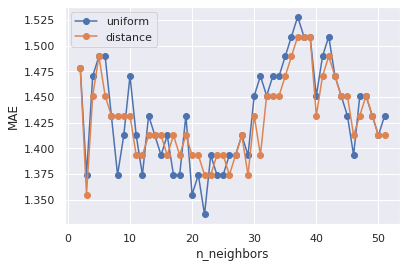

In [179]:
max_n_neighbors = int(0.1 * len(X))
for weights in ['uniform', 'distance']:
    knn = neighbors.KNeighborsRegressor(weights=weights)
    print(f"Weights: {weights} =>")
    generate_plot(X, y, knn, 'n_neighbors', range(2,max_n_neighbors), 10)
plt.show()  

### 1.1.2. Predictions

In [217]:
n_neighbors = 22
weights = 'uniform'
knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights) 

print('MAE: ', fit_regressor(knn, X_train, y_train))

MAE:  0.845121565321233


In [218]:
y_pred = LogShift.original(get_predictions(knn, X_test))

### 1.1.3. Visualisation

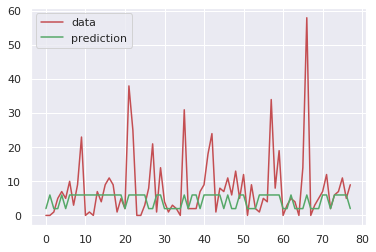

5.884615384615385

In [219]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.2. Decision Tree

### 1.2.1. Mean absolute error

Min Value: 1.123241630361193 (5)


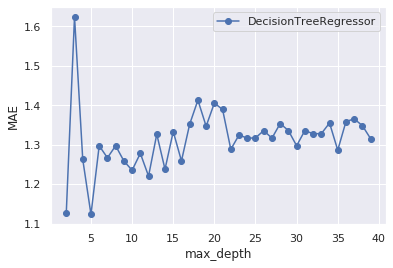

In [220]:
dt = DecisionTreeRegressor()
generate_plot(X, y, dt, 'max_depth', range(2,40), 10)
plt.show()

### 1.2.2. Predictions

In [221]:
dt = DecisionTreeRegressor(max_depth=5)
fit_regressor(dt, X_train, y_train)

0.934265933456812

In [222]:
y_pred = LogShift.original(get_predictions(dt, X_test))

### 1.2.3. Visualisation

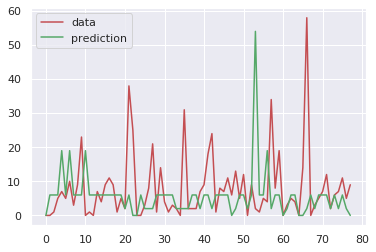

7.346153846153846

In [223]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.3. Random forest

### 1.3.1. Mean absolute error

Estimators: 2 =>
Min Value: 1.1664806126287728 (7)
Estimators: 3 =>
Min Value: 1.2779773568369315 (4)
Estimators: 4 =>
Min Value: 1.239515818375393 (4)
Estimators: 5 =>
Min Value: 1.2779773568369315 (9)
Estimators: 6 =>
Min Value: 1.31643889529847 (6)
Estimators: 7 =>
Min Value: 1.2972081260677006 (7)


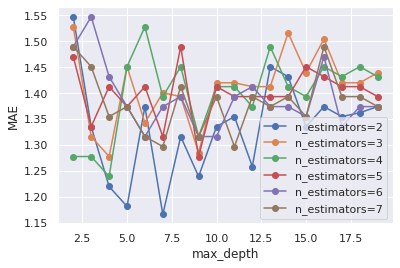

In [224]:
max_estimators = 8
max_max_depth = 20
for n in range(2, max_estimators):
    rf = RandomForestRegressor(n_estimators=n, criterion='mae', random_state=0)
    print(f"Estimators: {n} =>")
    generate_plot(X, y, rf, 'max_depth', range(2,max_max_depth), 10)
plt.show()

### 1.3.2. Predictions

In [225]:
rf = RandomForestRegressor(n_estimators=2, max_depth=7, criterion='mae', random_state=0)
fit_regressor(rf, X_train, y_train)

1.0602253445254268

In [226]:
y_pred = LogShift.original(get_predictions(rf, X_test))

### 1.3.3. Visualisation

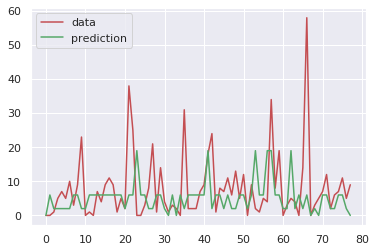

6.67948717948718

In [227]:
generate_visualization(y_pred, LogShift.original(y_test))

## 1.4. Linear SVR

### 1.4.1. Mean absolute error

Min Value: 1.1905585620154697 (0.0013572287829716537)


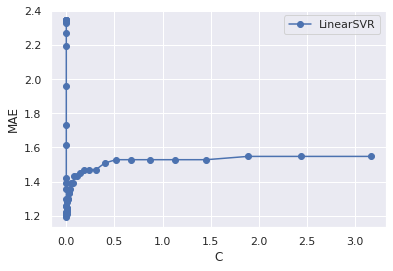

In [228]:
svr = svm.LinearSVR(C=1.0, epsilon=0.0, tol=1e-4, loss='squared_epsilon_insensitive', max_iter=1e4, random_state=99)
generate_plot(X, y, svr, 'C', np.logspace(-5,0.5,num=50), 10)
plt.show()

### 1.4.2. Predictions

In [229]:
svr = svm.LinearSVR(C=0.00136, epsilon=0.0, loss='squared_epsilon_insensitive', max_iter=1e4, random_state=99)
fit_regressor(svr, X_train, y_train)

0.8943112748954678

In [230]:
y_pred = LogShift.original(get_predictions(svr, X_test))

### 1.4.3. Visualisation

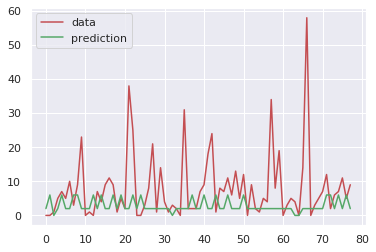

6.576923076923077

In [231]:
generate_visualization(y_pred, LogShift.original(y_test))

# 2. Automatic optimization

## Helper functions

In [195]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}\n".format(results['params'][candidate]))

## 2.1. Boosting

In [196]:
regressor_names = ['KNN', 'Decision tree', 'Random Forest', 'Ada Boost', 'GradientBoosting']
regressors = [KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights),
              DecisionTreeRegressor(max_depth=3),
              RandomForestRegressor(n_estimators=4, max_depth=3, criterion='mae',random_state=0),
              AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.5),
              GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0, loss='ls')]
regressors = {regressor_names[i]: regressors[i] for i in range(0,len(regressor_names))}

In [197]:
for i, reg in regressors.items():
    print(f'{i}:\n\tMAE:{get_accuracy(reg, X_train, y_train, 8)}')

KNN:
	MAE:0.9010546804326593
Decision tree:
	MAE:0.8976869725750146
Random Forest:
	MAE:0.9125327049961369
Ada Boost:
	MAE:0.9104017556482086
GradientBoosting:
	MAE:0.9578779432482049


In [198]:
regressors_df = pd.DataFrame({i:r.feature_importances_ for i,r in list(regressors.items())[1:]}, index=X_train.columns)

In [199]:
regressors_df.sum()

Decision tree       1.0
Random Forest       1.0
Ada Boost           1.0
GradientBoosting    1.0
dtype: float64

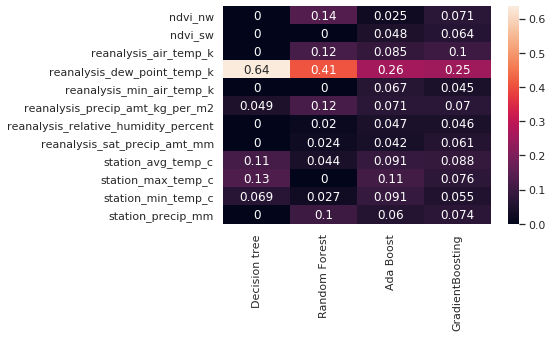

In [200]:
sns.heatmap(regressors_df, annot=True)

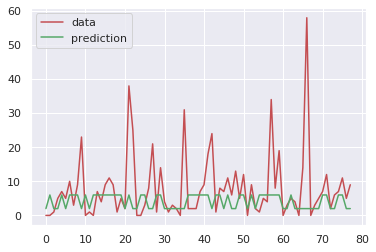

6.064102564102564

In [201]:
generate_visualization(LogShift.original(get_predictions(regressors['Ada Boost'], X_test)), LogShift.original(y_test))

## 2.2. Grid Search

### 2.2.1. Setting

In [202]:
param_dist = {"n_estimators": [2, 4, 8, 16, 32, 64], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": np.arange(2,16,2), # Maximum number of levels in tree
              "min_samples_split": np.arange(2,10,2), #  Minimum number of samples required to split a node
              "min_samples_leaf": np.arange(8,16,2), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [203]:
est_rf = RandomForestRegressor()
grid_regres = GridSearchCV(estimator=est_rf, param_grid=param_dist, cv=5)

grid_regres.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 8, 10, 12, 14]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': [2, 4, 8, 16, 32, 64]})

### 2.2.2. Results

In [204]:
report(grid_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.176 (std: 0.043)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 16}

Model with rank: 2
Mean validation score: 0.174 (std: 0.061)
Parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 16}

Model with rank: 3
Mean validation score: 0.174 (std: 0.057)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.171 (std: 0.048)
Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 64}

Model with rank: 5
Mean validation score: 0.171 (std: 0.038)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimat

In [205]:
grid_regres.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 16}

In [206]:
get_mae(grid_regres.best_estimator_, X_test, y_test)

0.8398503908391933

### 2.2.3. Visualisation

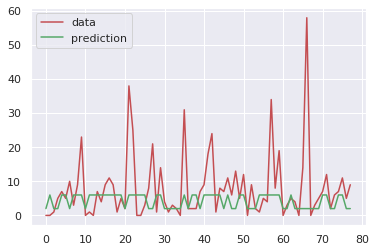

5.987179487179487

In [207]:
generate_visualization(LogShift.original(get_predictions(grid_regres.best_estimator_, X_test)), LogShift.original(y_test))

## 2.3. Randomized Search

### 2.3.1. Setting

In [208]:
param_dist = {"n_estimators": sp_randint(2,256), # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12, 8, 4, 2, None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

In [209]:
rnd_regres = RandomizedSearchCV(estimator=est_rf, param_distributions=param_dist, 
                               n_iter=1000, cv=5, random_state=0, n_jobs=-1)
rnd_regres.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1223cec0d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1220421e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f122270e040>},
                   random_state=0)

### 2.3.2. Results

In [210]:
report(rnd_regres.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.177 (std: 0.048)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 39, 'min_samples_split': 12, 'n_estimators': 18}

Model with rank: 2
Mean validation score: 0.175 (std: 0.053)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 34, 'min_samples_split': 13, 'n_estimators': 129}

Model with rank: 3
Mean validation score: 0.173 (std: 0.053)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 35, 'min_samples_split': 30, 'n_estimators': 246}

Model with rank: 4
Mean validation score: 0.173 (std: 0.050)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 39, 'min_samples_split': 25, 'n_estimators': 150}

Model with rank: 5
Mean validation score: 0.173 (std: 0.057)
Parameters: {'bootstrap': False, 

In [211]:
rnd_regres.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 39,
 'min_samples_split': 12,
 'n_estimators': 18}

In [212]:
get_mae(rnd_regres.best_estimator_, X_test, y_test)

0.8626804359134541

### 2.3.3. Visualisation

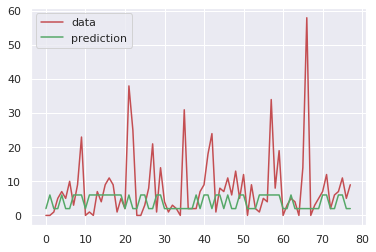

6.064102564102564

In [213]:
generate_visualization(LogShift.original(get_predictions(rnd_regres.best_estimator_, X_test)), LogShift.original(y_test))

## 2.4. Models collection comparison
Compare performance on the unsplitted dataset.

Best R2 score is 1.0 and it describes how good the model will perform on an unseen dataset.

In [233]:
collection = [knn, dt, rf, svr, grid_regres.best_estimator_, rnd_regres.best_estimator_]
collection += [regressors[r] for r in regressor_names[-2:]]

In [234]:
get_metrics = lambda reg: [
    get_mae(reg, X, y),
    get_mae(reg, X_test, y_test),
    r2_score(LogShift.original(y), LogShift.original(get_predictions(reg, X)))
]
scores = pd.DataFrame({str(r).replace('\n','').replace(' ',''):get_metrics(r) for r in collection}, index=['MAE', 'MAE_test', 'R2']).T
scores['MAE2'] = scores['MAE'].values * scores['MAE_test'].values

In [235]:
scores.sort_values(by='MAE2')

,MAE,MAE_test,R2,MAE2
"GradientBoostingRegressor(n_estimators=200,random_state=0)",0.456312,1.007505,0.510023,0.459737
"RandomForestRegressor(max_depth=4,max_features='sqrt',min_samples_leaf=10,min_samples_split=8,n_estimators=16)",0.761036,0.839850,-0.003096,0.639156
DecisionTreeRegressor(max_depth=5),0.684490,0.946921,0.090105,0.648158
"RandomForestRegressor(criterion='mae',max_depth=7,n_estimators=2,random_state=0)",0.680238,0.954131,0.122723,0.649036
KNeighborsRegressor(n_neighbors=22),0.816225,0.815596,-0.023578,0.665710
"AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),learning_rate=0.5,n_estimators=100)",0.777322,0.857623,0.055757,0.666649
"RandomForestRegressor(bootstrap=False,criterion='mae',max_features='sqrt',min_samples_leaf=39,min_samples_split=12,n_estimators=18)",0.792603,0.862680,-0.031425,0.683763
"LinearSVR(C=0.00136,loss='squared_epsilon_insensitive',max_iter=10000.0,random_state=99)",0.949575,1.008162,-0.161102,0.957326


In [236]:
scores.to_csv('metrics.csv')

In [237]:
for i in range(0,len(collection)):
    print(f"{i} : {collection[i]}")

0 : KNeighborsRegressor(n_neighbors=22)
1 : DecisionTreeRegressor(max_depth=5)
2 : RandomForestRegressor(criterion='mae', max_depth=7, n_estimators=2,
                      random_state=0)
3 : LinearSVR(C=0.00136, loss='squared_epsilon_insensitive', max_iter=10000.0,
          random_state=99)
4 : RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=8, n_estimators=16)
5 : RandomForestRegressor(bootstrap=False, criterion='mae', max_features='sqrt',
                      min_samples_leaf=39, min_samples_split=12,
                      n_estimators=18)
6 : AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.5, n_estimators=100)
7 : GradientBoostingRegressor(n_estimators=200, random_state=0)


# 3. Submission
Run prediction with best regressor and create submittable result for datadriven competition.

In [232]:
city

'iq'

### Select best regressor for submission

In [166]:
best_regressor_sj = collection[7]
best_regressor_sj

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [238]:
best_regressor_iq = collection[7]
best_regressor_iq

GradientBoostingRegressor(n_estimators=200, random_state=0)

### Load test
Execute only once per (sj, iq) set generation.

In [167]:
# whether input should be transformed by PCA
is_pca = False

In [168]:
test = preprocess(pd.read_csv('dengue_features_test.csv'), pca=is_pca)

In [169]:
test['total_cases'] = np.zeros(len(test))

In [170]:
if not is_pca:
    test.drop(needs_cleaning, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

### Run San Juan regressor

> PerformanceWarning caused by unsorted index

In [171]:
test.loc['sj','total_cases'] = LogShift.original(get_predictions(best_regressor_sj, test.drop('total_cases', axis=1).loc['sj']))

/home/gbs/.conda/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2857: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


### Run Iquitos regressor

> PerformanceWarning caused by unsorted index

In [239]:
test.loc['iq','total_cases'] = LogShift.original(get_predictions(best_regressor_iq, test.loc['iq'].drop('total_cases', axis=1)))

/home/gbs/.conda/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2857: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


### Create submission file

In [240]:
test.iloc[:,-5:]

station_avg_temp_c  station_max_temp_c  \
city year weekofyear                                           
sj   2008 18                   -0.675916            0.399988   
          19                   -1.049736           -1.314888   
          20                    0.468905            0.140158   
          21                    0.574042            0.399988   
          22                    0.211904            0.399988   
...                                  ...                 ...   
iq   2013 22                    0.036677            0.036226   
          23                    0.134804            0.659818   
          24                   -0.126869            0.036226   
          25                   -0.535734           -0.171638   
          26                   -0.004210            0.036226   

                      station_min_temp_c  station_precip_mm  total_cases  
city year weekofyear                                                      
sj   2008 18                   -0.350673           1.194382          6.0  
          19                   -0.065305           0.010900         19.0  
          20                    0.277136          -0.894797         19.0  
          21                    1.190314          -0.972924         19.0  
          22                    0.562504           1.451912          6.0  
...                                  ...                ...          ...  
iq   2013 22                   -0.293600          -0.026717          2.0  
          23                   -0.521894           0.986043          2.0  
          24                   -0.407747           1.715229          2.0  
          25                   -0.293600           0.005112          2.0  
          26                   -0.179453          -0.550458          2.0  

[416 rows x 5 columns]

In [241]:
save_results(test.loc[:,'total_cases'].values, 'submission.csv', test.index)

'submission.csv'